# **Python for Acoustic Phonetics**

In [ ]:
!pip install -q praat-parselmouth


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
from google.colab import drive
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import parselmouth as pm
from IPython.display import Image, display
plt.style.use('ggplot')

In [2]:
# mount to GD
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir('drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis')
print(f'Current wd: {os.getcwd()}')

Current wd: /content/drive/MyDrive/PORTFOLIOS/NLP-PROJECTS/PYTHON-FOR-LINGUISTICS/python-for-linguistic-analysis


In [104]:
# get list of items
os.listdir('./data')

['kata-mutiara.mp3']

In [106]:
# import audio file
snd = pm.Sound('./data/kata-mutiara.mp3')

In [201]:
# check for listening
Audio(data=snd, rate=snd.sampling_frequency)

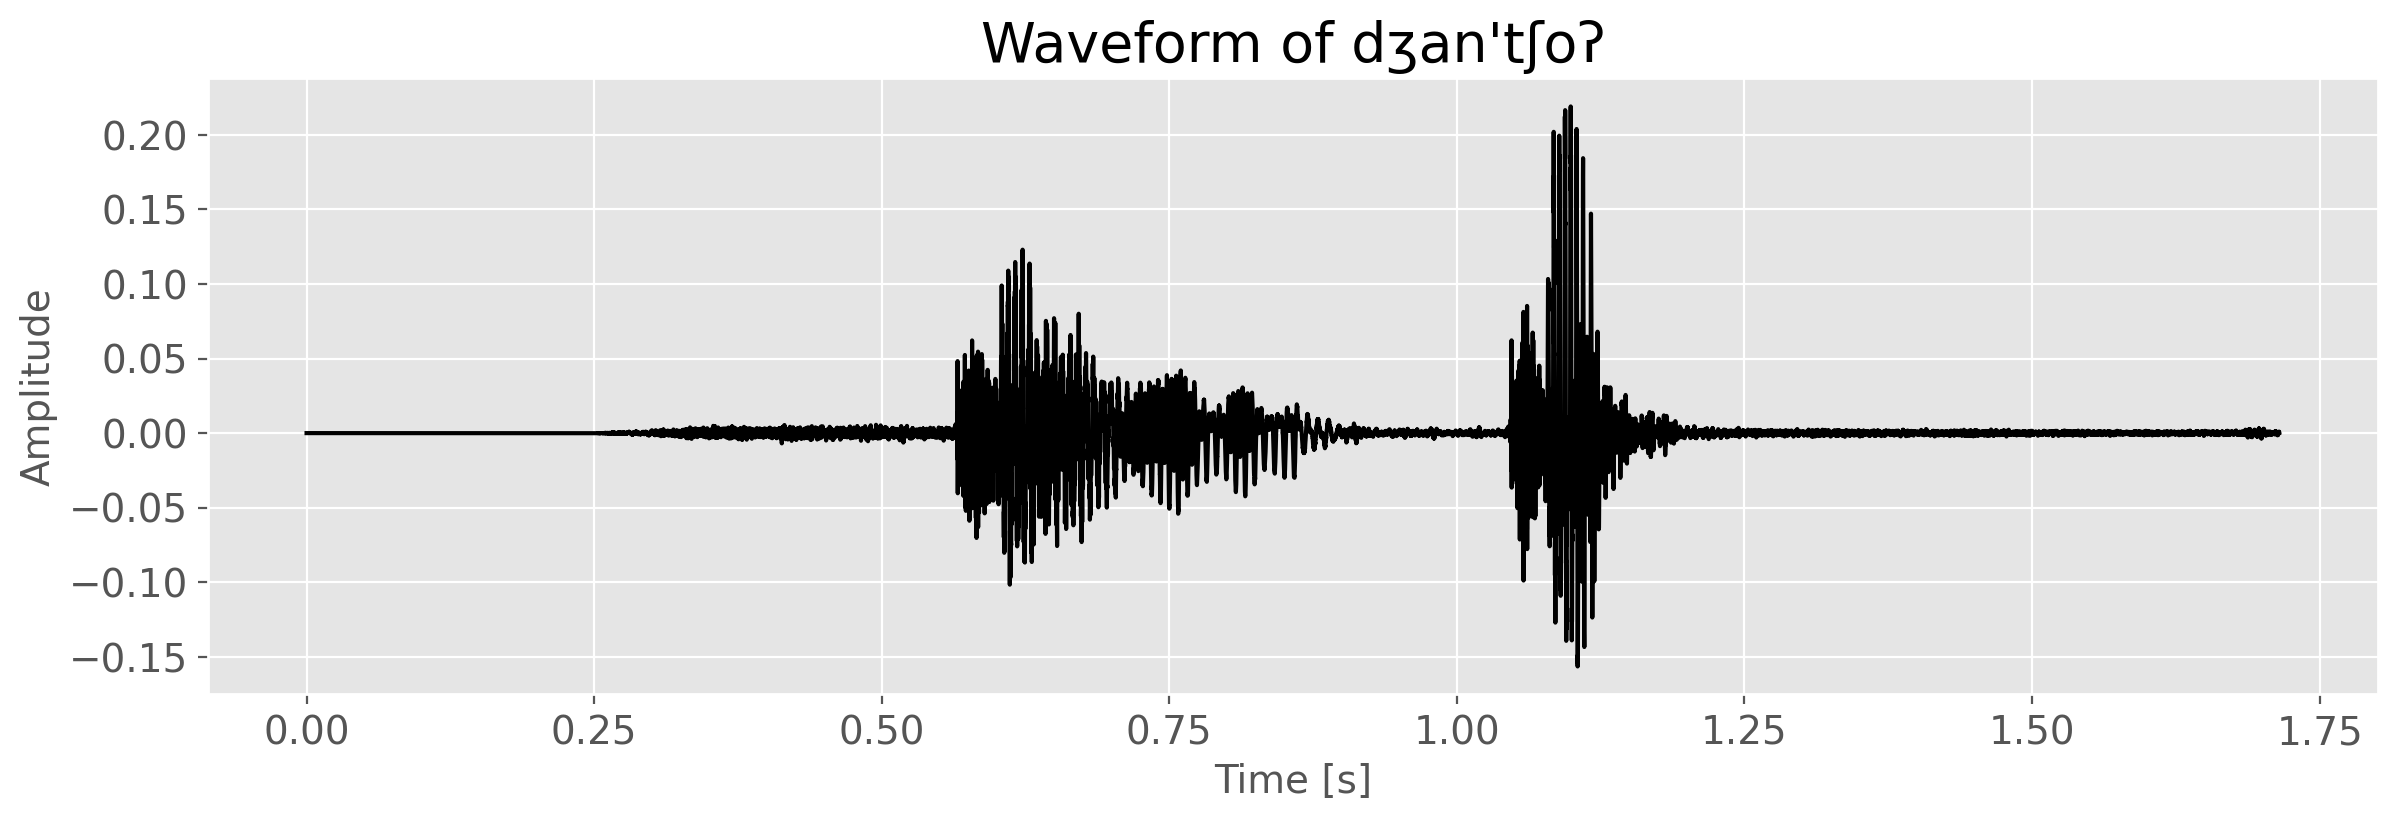

In [117]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd.xs(), snd.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.yticks(fontsize=14)
plt.ylabel('Amplitude', size=14)
plt.title('Waveform of dʒan\'tʃoʔ', size=20)
plt.show()

In [203]:
# filter necessary part
snd_filtered = snd.extract_part(from_time=0.50, to_time=1.25, preserve_times=True)

In [205]:
Audio(data=snd_filtered, rate=snd_filtered.sampling_frequency)

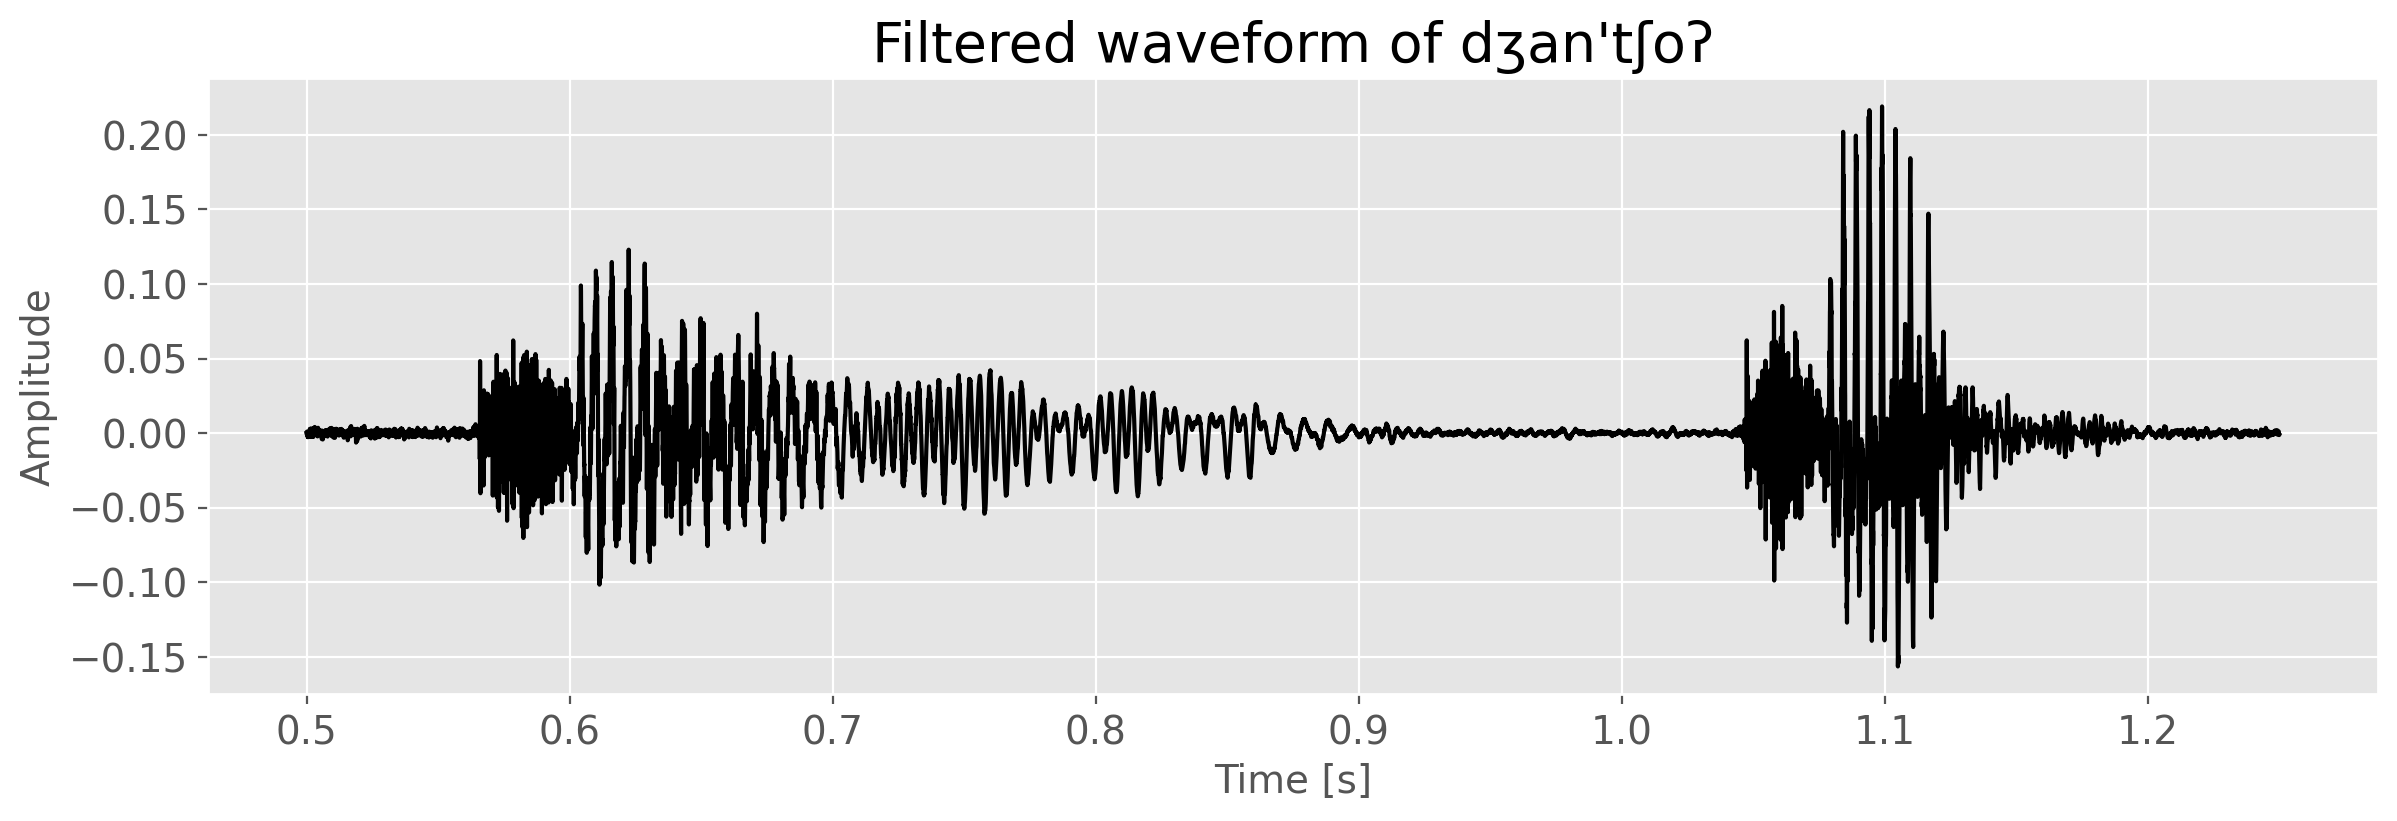

In [206]:
plt.figure(figsize=(14, 4), dpi=200)
plt.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Time [s]', size=14)
plt.ylabel('Amplitude', size=14)
plt.title('Filtered waveform of dʒan\'tʃoʔ', size=20)
plt.show()

In [218]:
# function for drawing spectogram
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='binary')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

# function for drawing pitch
def draw_pitch(pitch):
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # plt.plot(pitch.xs(), pitch_values, 'o', markersize=6, color='white', label='_nolegend_')
    # plt.plot(pitch.xs(), pitch_values, 'o', markersize=3)
    plt.plot(pitch.xs(), pitch_values, linewidth=4, color='white', label='_nolegend_')
    plt.plot(pitch.xs(), pitch_values, linewidth=2, color='red')
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")
    plt.legend(['pitch'])

# function for drawing intensity
def draw_intensity(intensity):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=4, color='white', label='_nolegend_')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=2, color='blue')
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
    plt.legend(['intensity'])

In [219]:
# get spectogram
spec = snd_filtered.to_spectrogram()

# get pitch
pitch = snd_filtered.to_pitch()

# get intensity
intensity = snd_filtered.to_intensity()

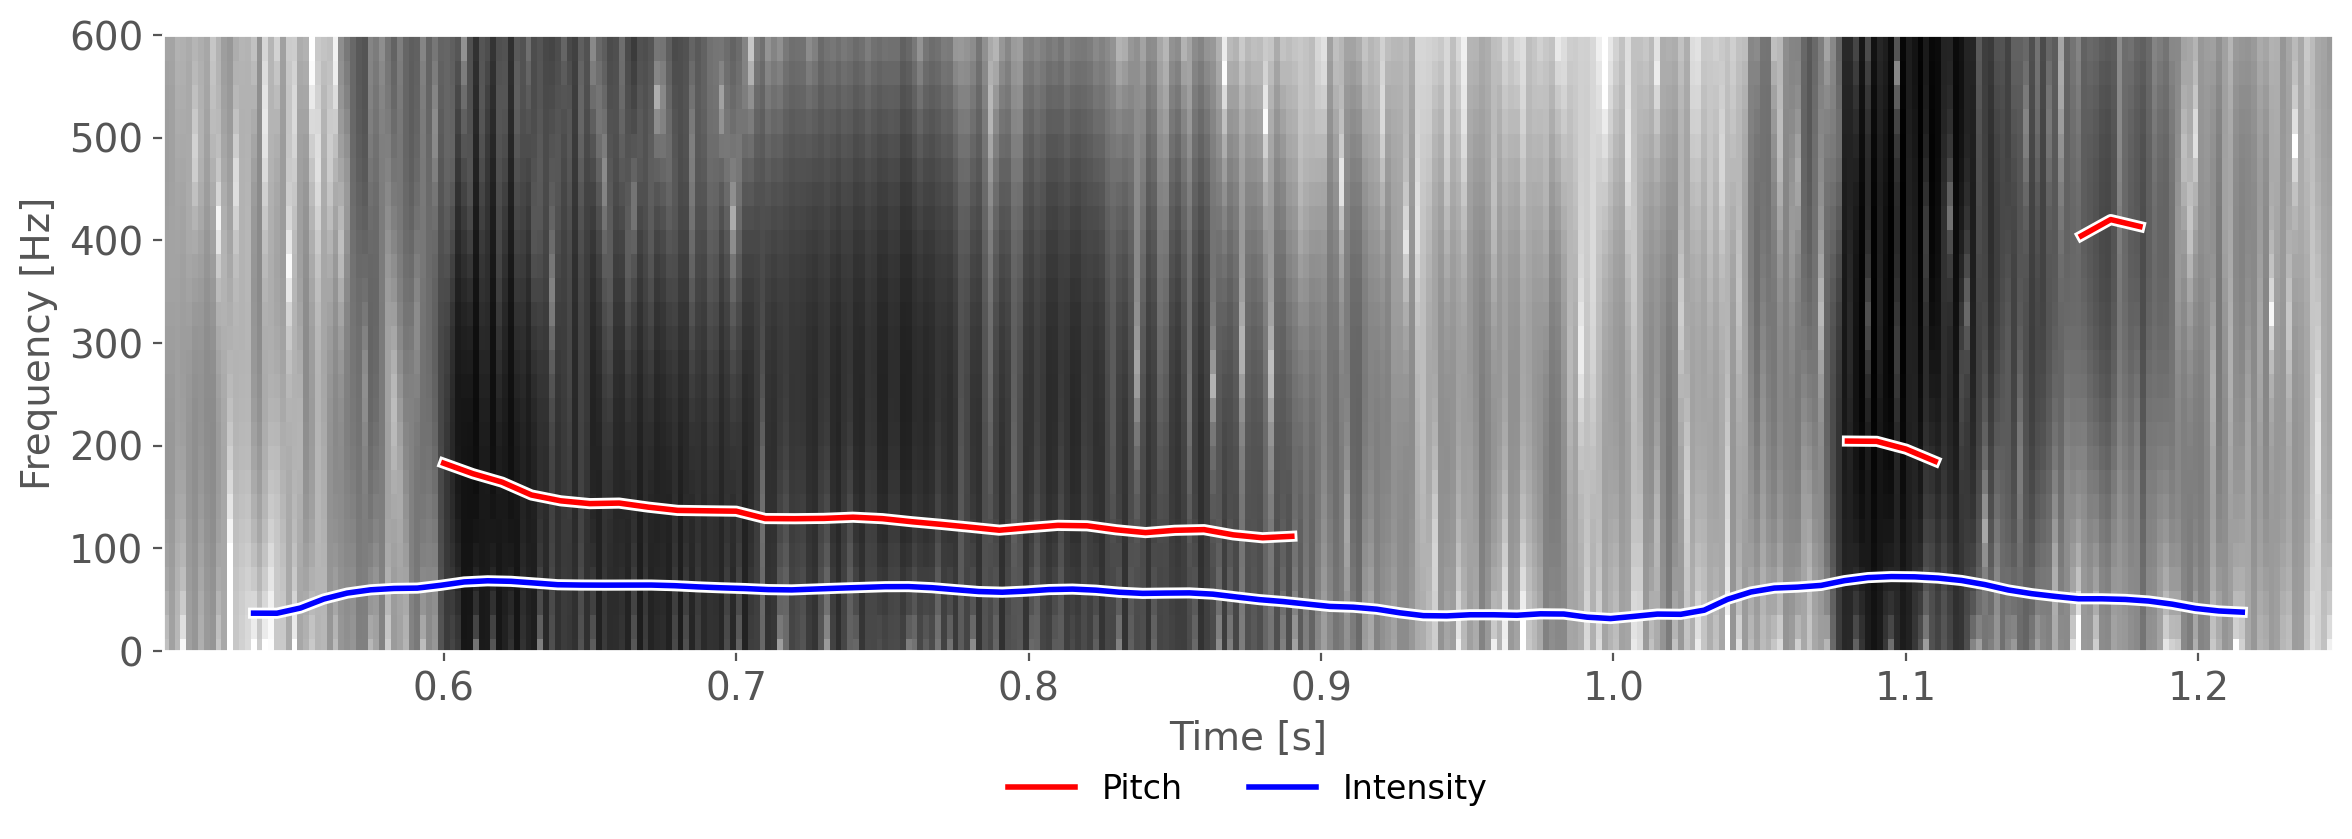

In [230]:
plt.figure(figsize=(14, 4), dpi=200)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
plt.xlabel("Time [s]", size=14)
plt.ylabel("Frequency [Hz]", size=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
plt.grid(True)
plt.show()

In [223]:
plt.style.use('default')

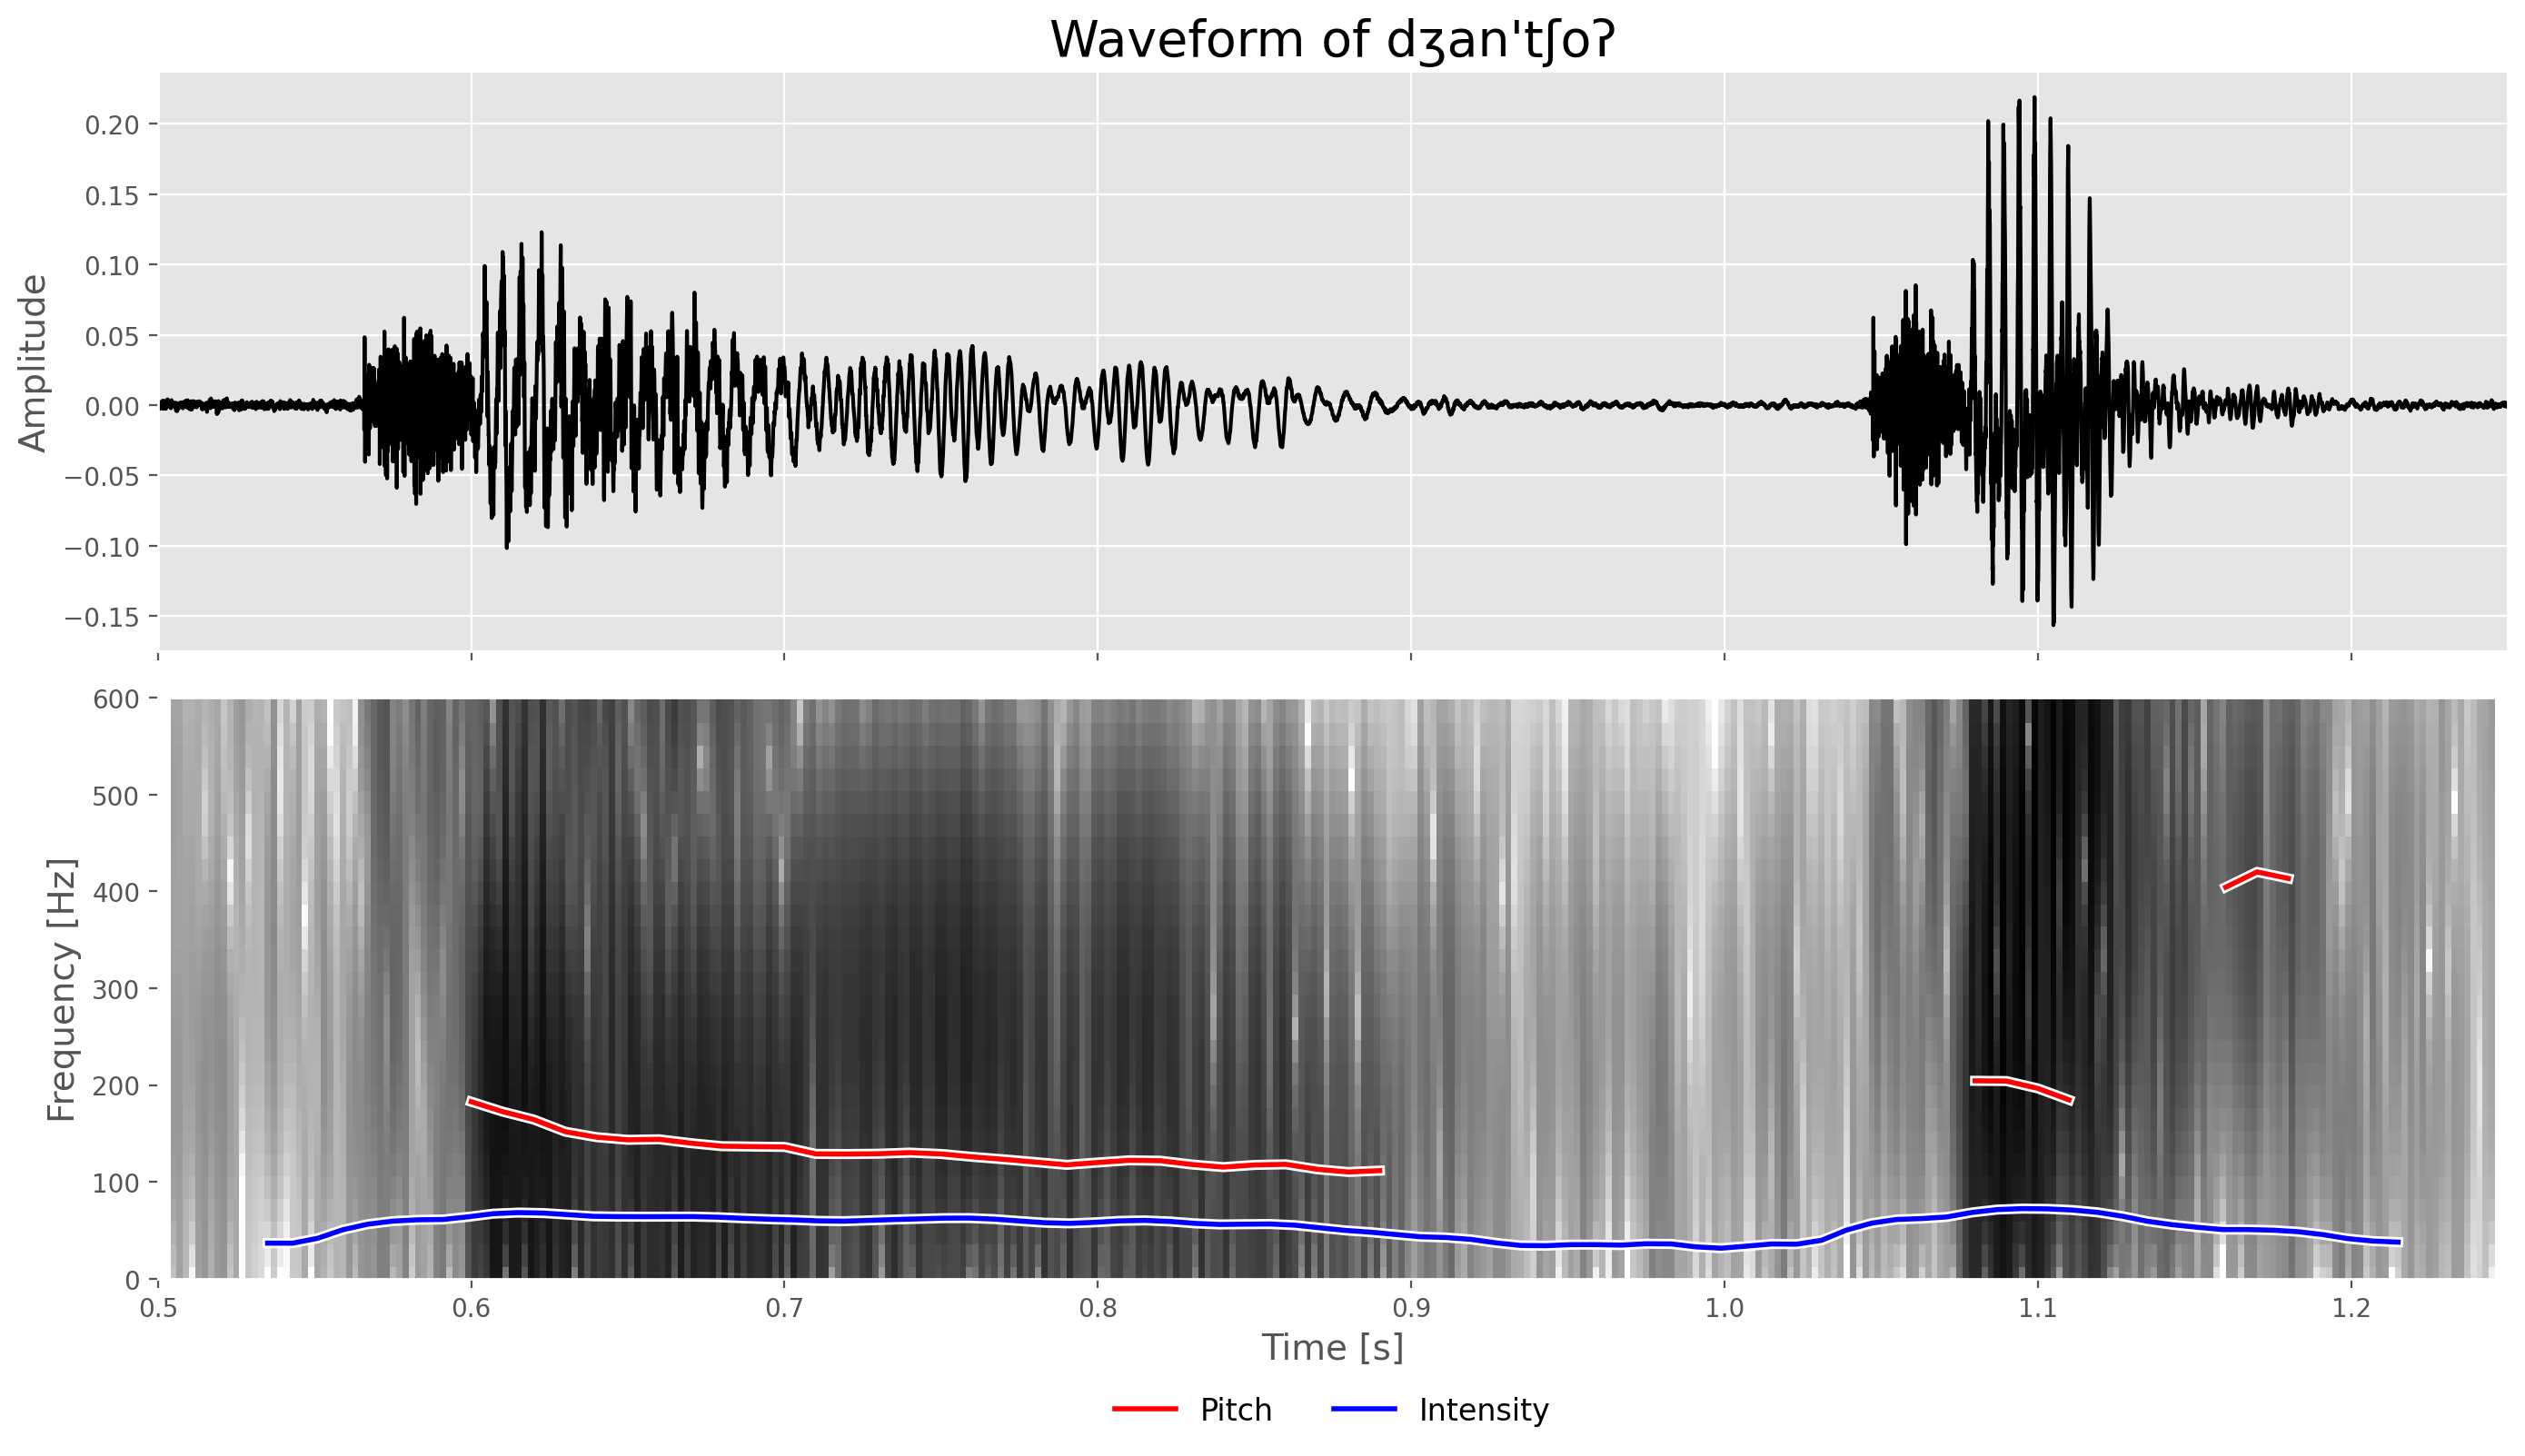

In [233]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), dpi=200, sharex=True)

# plot waveform in ax1
ax1.plot(snd_filtered.xs(), snd_filtered.values.T, color='black')
ax1.set_ylabel("Amplitude", size=14)
ax1.set_title("Waveform of dʒan'tʃoʔ", size=20)
ax1.grid(True)

# add spectogram, pitch, and intensity
ax2.set_facecolor('none')
plt.sca(ax2)
draw_spectrogram(spec)
draw_pitch(pitch)
draw_intensity(intensity)
ax2.set_xlabel("Time [s]", size=14)
ax2.set_ylabel("Frequency [Hz]", size=14)
ax2.grid(False)
ax2.legend(['Pitch', 'Intensity'], loc='lower center',
           bbox_to_anchor=(0.5, -0.3), ncols=2,
           fontsize=12, frameon=False)
x_min, x_max = 0.5, 1.25  # Replace with your desired start and end times
ax1.set_xlim(x_min, x_max)
plt.tight_layout()
plt.show()

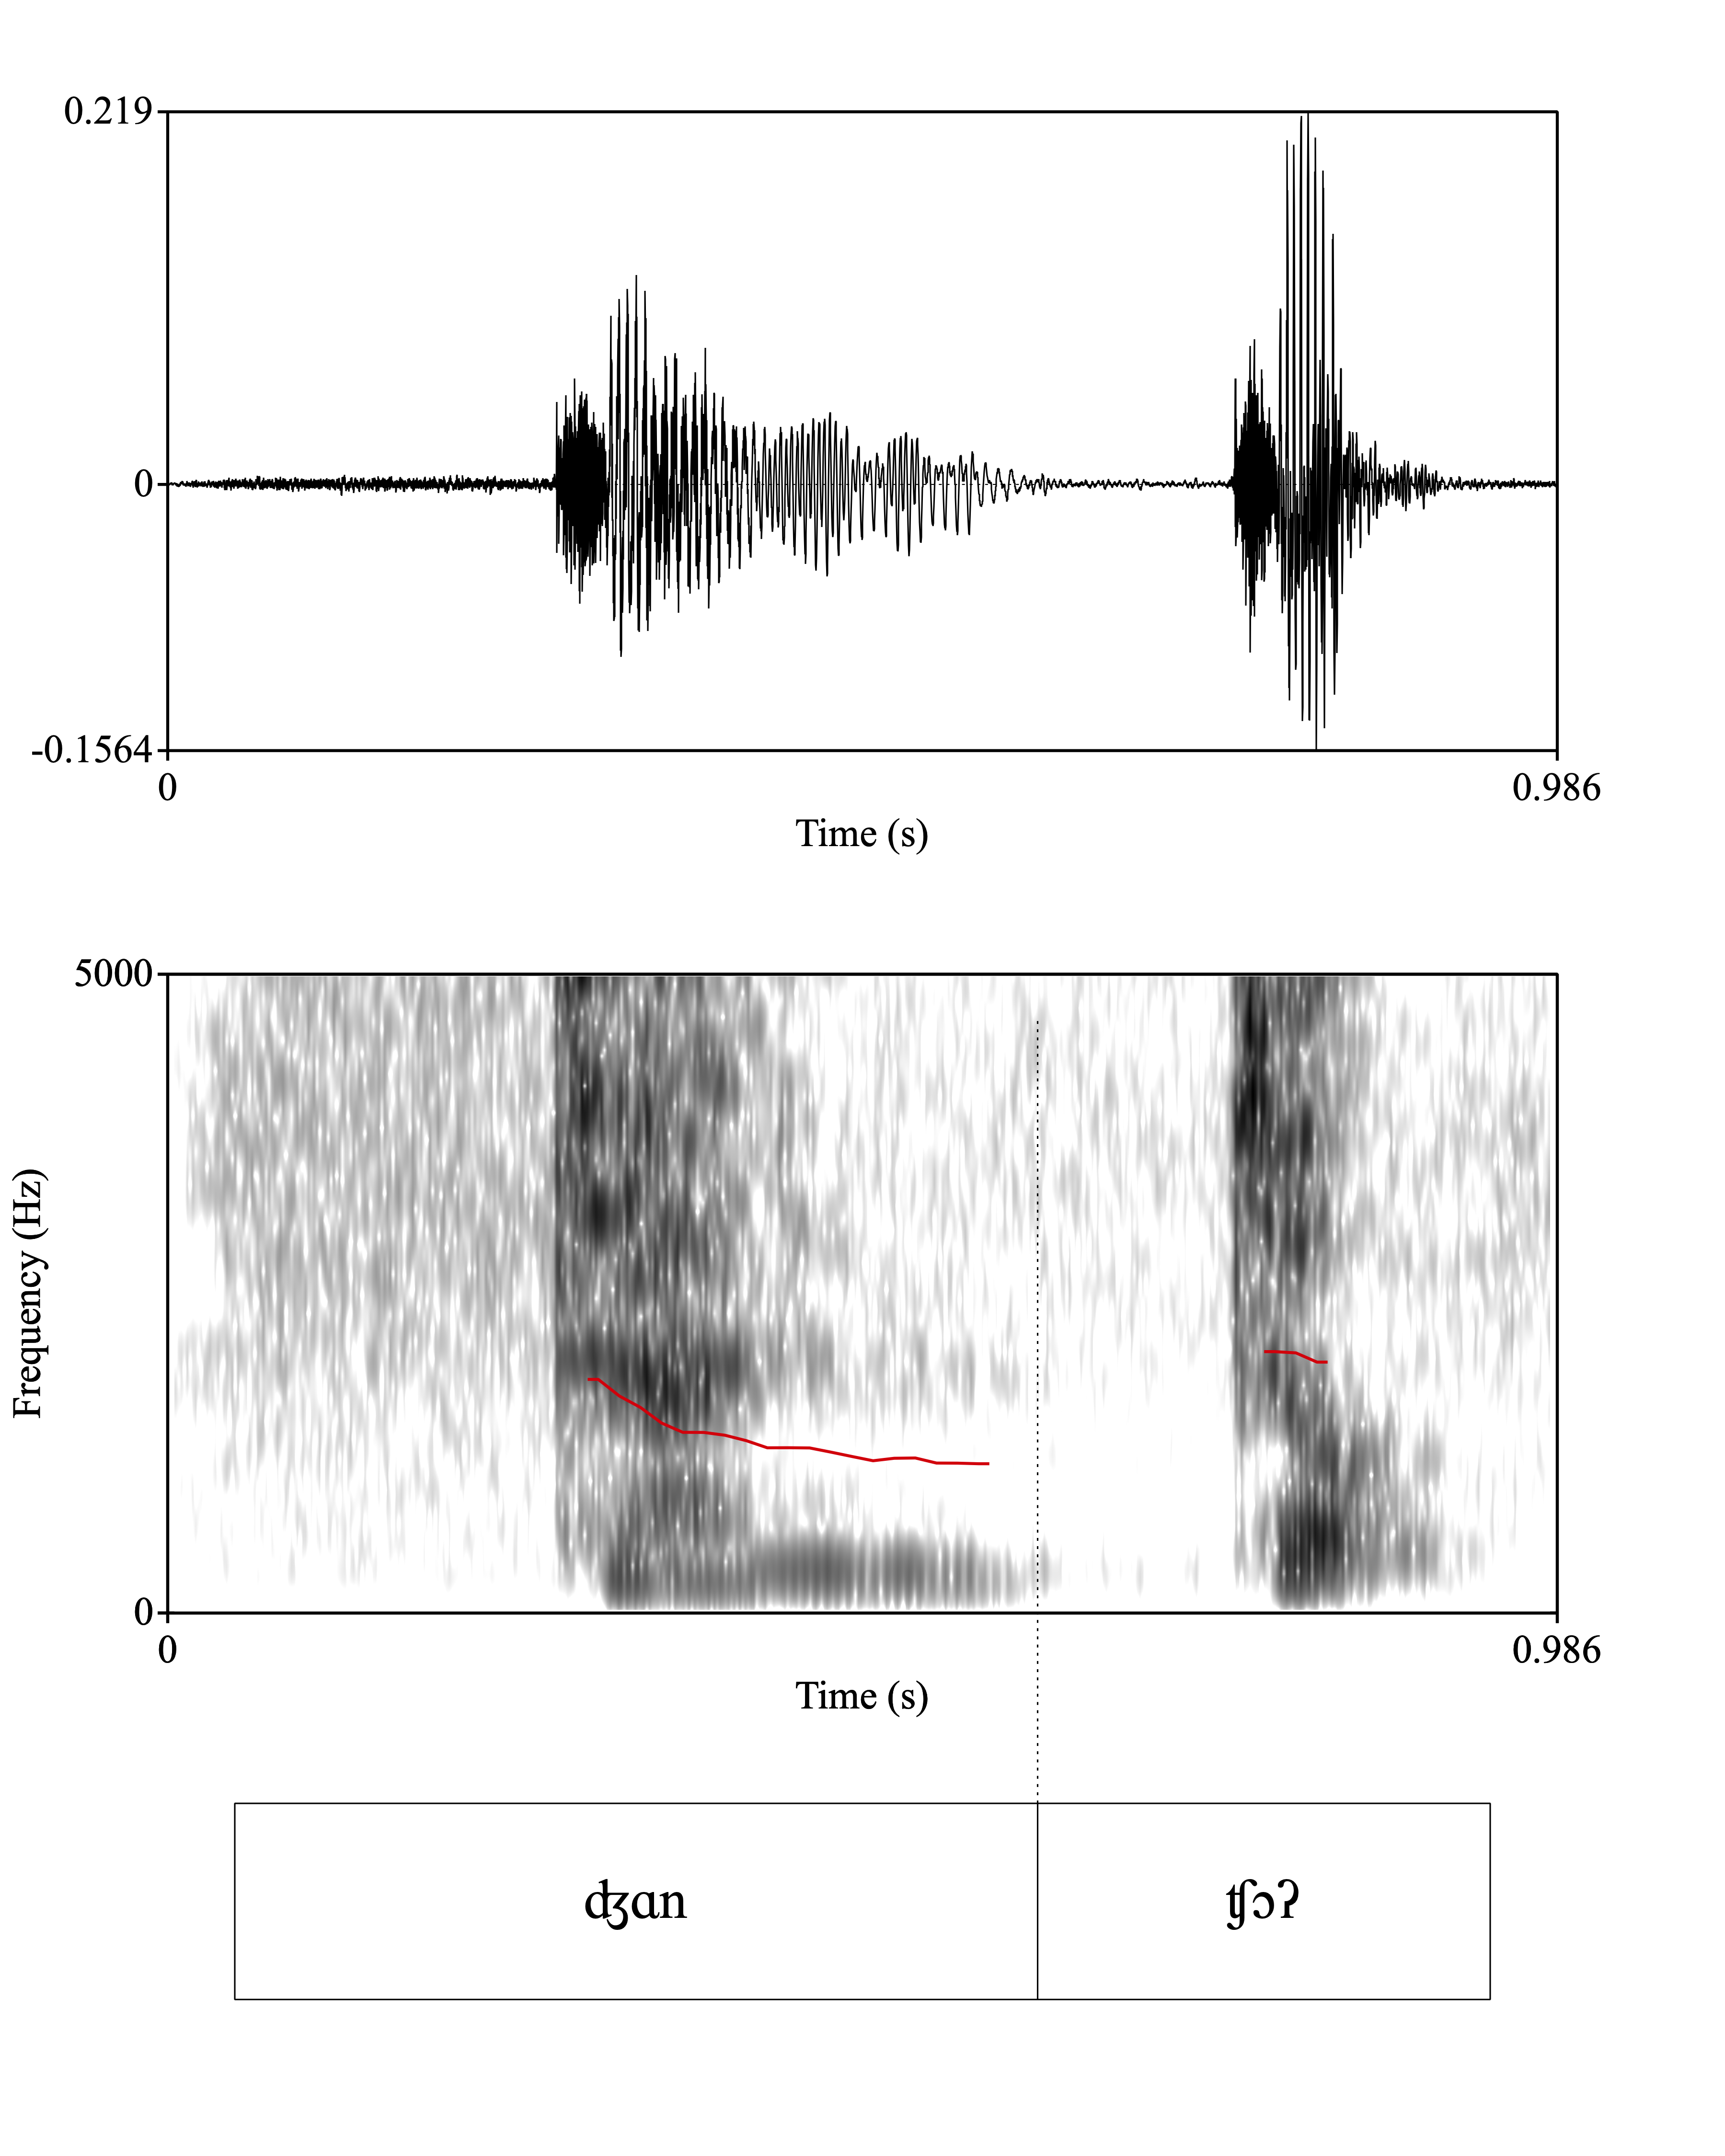

In [12]:
# call speech analysis with Praat
display(Image("../img/praat.png"))